In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
%matplotlib inline
from sklearn import decomposition
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [8]:
pca = decomposition.PCA(n_components=2)
X_centered = X - X.mean(axis=0)
X_pca = pca.fit_transform(X_centered)

In [9]:
fig = plt.figure(1, figsize=(6, 5))
plt.clf()

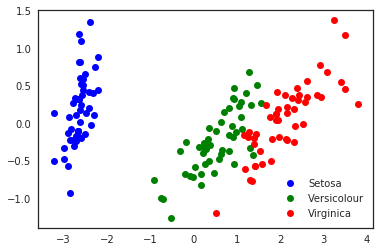

In [12]:
plt.plot(X_pca[y==0, 0], X_pca[y==0, 1], 'bo', label='Setosa')
plt.plot(X_pca[y==1, 0], X_pca[y==1, 1], 'go', label='Versicolour')
plt.plot(X_pca[y==2, 0], X_pca[y==2, 1], 'ro', label='Virginica')

plt.legend(loc=0)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=.3, stratify=y, random_state=42)

In [18]:
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print("Accuracy: {:.5f}".format(accuracy_score(y_test, preds.argmax(axis=1))))

Accuracy: 0.91111


# PCA with 1 component!

In [23]:
pca_1 = decomposition.PCA(n_components=1)
X_pca_1 = pca_1.fit_transform(X_centered)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_pca_1, y, test_size=.3, stratify=y, random_state=42)
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print("Accuracy: {:.5f}".format(accuracy_score(y_test, preds.argmax(axis=1))))

Accuracy: 0.91111
